<a href="https://colab.research.google.com/github/Godwin-Anku/MNIST-Multilayer-Perceptron-/blob/main/Multilayer_Perceptron_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import random
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from tensorflow.keras.utils import to_categorical

In [130]:
SEED_VALUE = 42
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [131]:
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['image.cmap'] = 'gray'

In [132]:
(X_train_all, y_train_all), (X_test, y_test) = mnist.load_data()

In [133]:
X_train_all[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [134]:
y_train_all[0]

5

In [135]:
print(X_train_all.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [136]:
X_valid = X_train_all[:10000]
X_train = X_train_all[10000:]
y_valid = y_train_all[:10000]
y_train = y_train_all[10000:]

In [137]:
print(f'Validation predictor dimesnsions: {X_valid.shape}')
print(f'Train predictor dataset dimensions: {X_train.shape}')
print(f'Testing predictor dataset dimensions: {X_test.shape}')
print(f'Train target dataset dimensions: {y_train.shape}')
print(f'Validation target dataset dimensions: {y_valid.shape}')
print(f'Test target dataset dimensions: {y_test.shape}')

Validation predictor dimesnsions: (10000, 28, 28)
Train predictor dataset dimensions: (50000, 28, 28)
Testing predictor dataset dimensions: (10000, 28, 28)
Train target dataset dimensions: (50000,)
Validation target dataset dimensions: (10000,)
Test target dataset dimensions: (10000,)


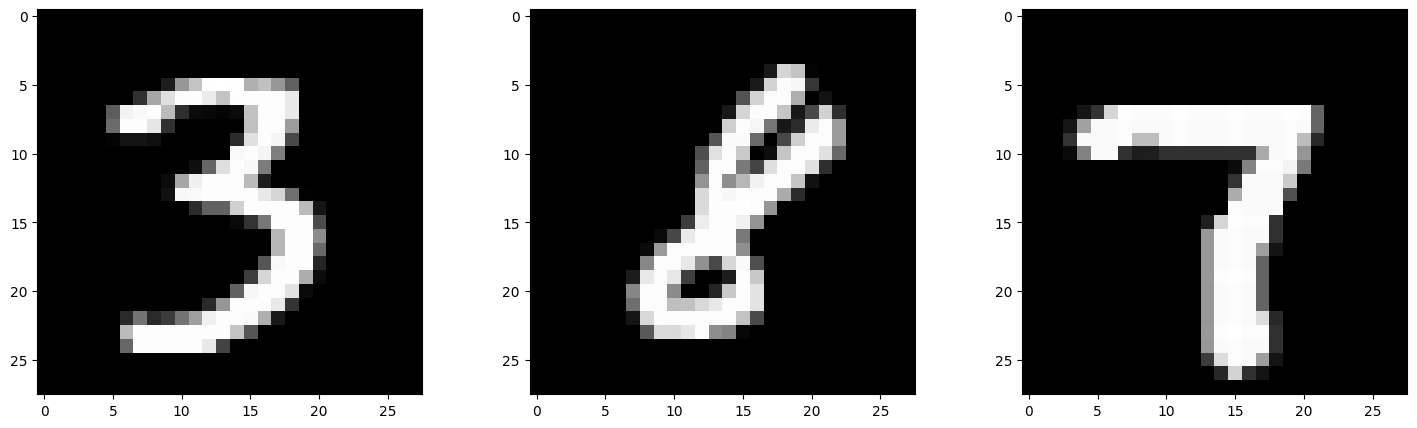

In [138]:
plt.figure(figsize = (18, 5))
for i in range(3):
  plt.subplot(1, 3, i+1)
  plt.axis(True)
  plt.imshow(X_train[i], cmap = 'gray')
  plt.subplots_adjust(wspace = 0.2, hspace = 0.2)

In [139]:
y_train[:10]

array([3, 8, 7, 9, 9, 0, 1, 1, 5, 2], dtype=uint8)

In [140]:
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_train = X_train.astype('float32') / 255
X_valid = X_valid.reshape((X_valid.shape[0], 28 * 28))
X_valid = X_valid.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28 * 28))
X_test = X_test.astype('float32') / 255

In [141]:
X_train.shape

(50000, 784)

In [142]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [143]:
y_valid[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [144]:
y_train[:10]

array([3, 8, 7, 9, 9, 0, 1, 1, 5, 2], dtype=uint8)

In [145]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [146]:
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

In [147]:
y_train[:10]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [148]:
y_test[:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [149]:
y_valid[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [150]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape = (X_train.shape[1], )))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [151]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'],)

In [152]:
training_results = model.fit(X_train, y_train, epochs = 21, batch_size = 64, validation_data = (X_valid, y_valid));

Epoch 1/21
782/782 [==============================] - 3s 3ms/step - loss: 0.2833 - accuracy: 0.9173 - val_loss: 0.1755 - val_accuracy: 0.9450
Epoch 2/21
782/782 [==============================] - 2s 2ms/step - loss: 0.1203 - accuracy: 0.9635 - val_loss: 0.1262 - val_accuracy: 0.9641
Epoch 3/21
782/782 [==============================] - 2s 3ms/step - loss: 0.0833 - accuracy: 0.9737 - val_loss: 0.1261 - val_accuracy: 0.9622
Epoch 4/21
782/782 [==============================] - 2s 3ms/step - loss: 0.0635 - accuracy: 0.9794 - val_loss: 0.0934 - val_accuracy: 0.9740
Epoch 5/21
782/782 [==============================] - 3s 3ms/step - loss: 0.0492 - accuracy: 0.9846 - val_loss: 0.0991 - val_accuracy: 0.9747
Epoch 6/21
782/782 [==============================] - 2s 3ms/step - loss: 0.0401 - accuracy: 0.9881 - val_loss: 0.0940 - val_accuracy: 0.9742
Epoch 7/21
782/782 [==============================] - 2s 3ms/step - loss: 0.0319 - accuracy: 0.9900 - val_loss: 0.0914 - val_accuracy: 0.9765
Epoch 

In [153]:
X_train_loss = training_results.history['loss']
X_valid_loss = training_results.history['val_loss']
X_train_acc = training_results.history['accuracy']
X_valid_acc = training_results.history['val_accuracy']

In [166]:
def plot_results(metrics, metric_name = None, color = None, ylabel = None, ylim = None, title = None):
  fig, ax = plt.subplots(figsize = (15, 6))

  if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
    metrics = [metrics, ]
    metric_name = [metric_name, ]

  for idx, metric in enumerate(metrics):
    ax.plot(metric, color = color[idx])

  plt.grid(True)
  plt.xlabel('Epoch')
  plt.ylabel(ylabel)
  plt.xlim([0, len(X_train_loss)])
  plt.ylim(ylim)
  plt.title(title)
  plt.legend(metric_name)
  ax.xaxis.set_major_locator(MultipleLocator(5))
  ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
  ax.xaxis.set_minor_locator(MultipleLocator(1))
  plt.show()
  plt.close()

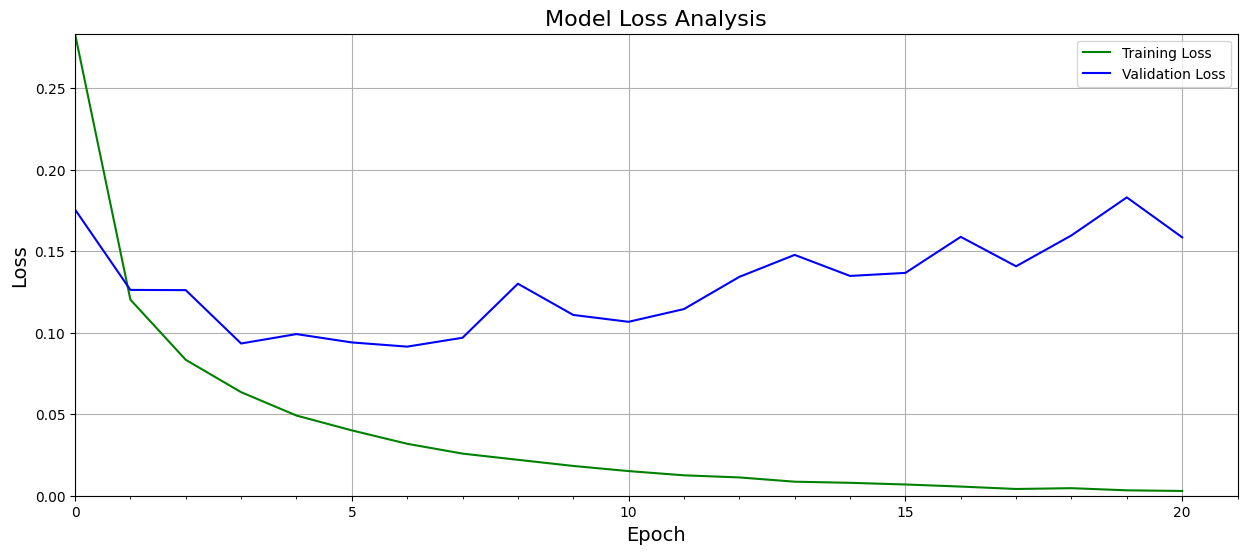

In [167]:
plot_results(metrics = [X_train_loss, X_valid_loss], metric_name = ['Training Loss', 'Validation Loss'], color = ['g', 'b'], ylabel = 'Loss', ylim = [0, max(X_train_loss)], title = 'Model Loss Analysis')

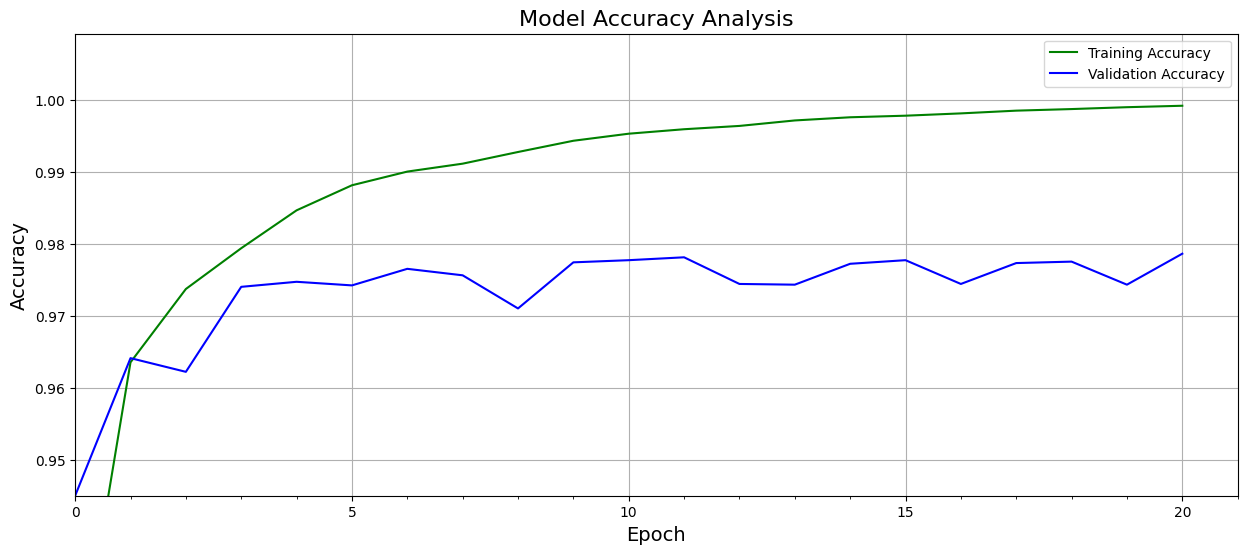

In [172]:
plot_results(metrics = [X_train_acc, X_valid_acc], metric_name = ['Training Accuracy', 'Validation Accuracy'], color = ['g', 'b'], ylabel = 'Accuracy', ylim = [min(X_valid_acc), max(X_train_acc) + 0.01], title = 'Model Accuracy Analysis')

In [175]:
predictions = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [197]:
index = 150
print(f'Ground Truth digit: {np.argmax(y_test[index])}\n')
for i in range(10):
  print(f'Digit: {i}\t\tProbability: {predictions[index][i]}')
print(f'\nPredicted label: {np.argmax(predictions[index])}')

Ground Truth digit: 9

Digit: 0		Probability: 3.2699389291397044e-17
Digit: 1		Probability: 3.2461907084326894e-23
Digit: 2		Probability: 1.0304279880440447e-18
Digit: 3		Probability: 1.2628904812097413e-13
Digit: 4		Probability: 4.576429546159931e-16
Digit: 5		Probability: 8.158415783221518e-12
Digit: 6		Probability: 9.939177247310566e-18
Digit: 7		Probability: 1.0099858910360762e-13
Digit: 8		Probability: 4.968393474413801e-10
Digit: 9		Probability: 0.9999999403953552

Predicted label: 9


In [199]:
predicted_labels = [np.argmax(i) for i in predictions]
y_test_integer_labels = tf.argmax(y_test, axis = 1)
cm = tf.math.confusion_matrix(labels = y_test_integer_labels, predictions = predicted_labels)

In [200]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    1,    1,    1,    0,    3,    1,    2,    0],
       [   0, 1110,    3,    1,    0,    1,    3,    2,   15,    0],
       [   1,    1, 1009,    4,    2,    0,    1,    5,    9,    0],
       [   0,    1,    7,  986,    0,    5,    0,    4,    5,    2],
       [   0,    0,    4,    0,  963,    0,    7,    4,    0,    4],
       [   3,    0,    0,    7,    1,  868,    7,    0,    4,    2],
       [   4,    1,    1,    0,    5,    5,  940,    0,    2,    0],
       [   1,    0,    9,    1,    0,    0,    0, 1012,    3,    2],
       [   2,    0,    3,    2,    1,    1,    2,    4,  958,    1],
       [   2,    3,    1,   11,   11,    3,    1,    9,   19,  949]],
      dtype=int32)>

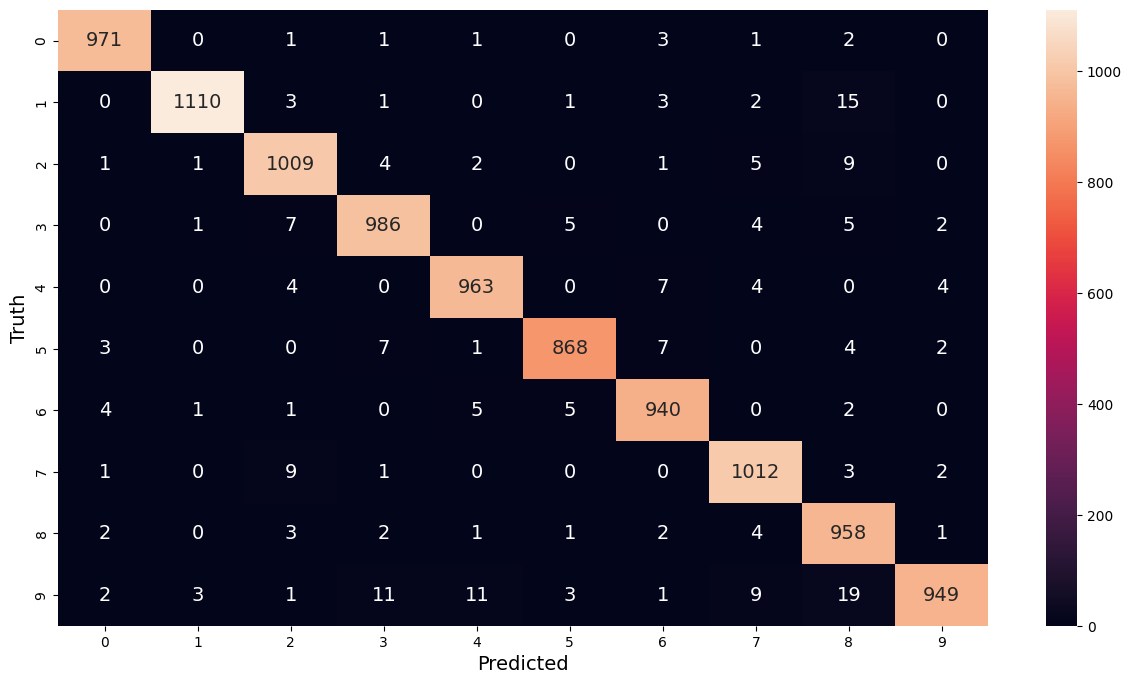

In [201]:
import seaborn as sns

plt.figure(figsize = (15, 8))
sns.heatmap(cm, annot = True, fmt = 'd', annot_kws = {'size': 14})
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()